In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import os
from ipywidgets import Checkbox, interactive
from IPython.display import display

In [2]:
def getInfo(fileName):
    mode = fileName[2]
    if mode=="3":
        opt = "timeBasedDecay"
    elif mode=="4":
        opt = "stepDecay"
    elif mode=="5":
        opt = "exponentialDecay"
    elif mode=="6":
        opt = "constant"
    
    idx2= fileName.rfind("_")
    idx1 = fileName.rfind("_",0,idx2)
    alg = fileName[idx1+1:idx2]
    idx0 = fileName.rfind("_",0,idx1)
    b_pos = fileName[idx0+1:idx1]
    idx3 = fileName.rfind(".")
    lr = fileName[idx2+1:idx3]
    
   
    
    return alg,opt,b_pos,lr


In [3]:
print("\n"+"Please select algorithm: "+"\n")
l_alg = ["sgd","Adam","RMSprop","Adagrad","Momentum"]
chk_alg = [Checkbox(description=a) for a in l_alg]
#print(chk)
#print(chk[0].value)
checked_alg=[]
def updatePlot(**kwargs):
    for k, v in kwargs.items():
        if v==True and (k not in checked_alg): 
            checked_alg.append(k)
            #print(k)
        if v==False and (k in checked_alg) : 
            checked_alg.remove(k)
            #print(k)

interact(updatePlot, **{c.description: c.value for c in chk_alg})  



Please select algorithm: 



interactive(children=(Checkbox(value=False, description='sgd'), Checkbox(value=False, description='Adam'), Che…

<function __main__.updatePlot(**kwargs)>

In [10]:
print("\n"+"Please select learning rate schedule: "+"\n")
l_sch = ["constant","stepDecay", "timeBasedDecay","exponentialDecay"]
chk_sch = [Checkbox(description=a) for a in l_sch]
#print(chk)
#print(chk[0].value)
checked_sch=[]
def updatePlot(**kwargs):
    for k, v in kwargs.items():
        if v==True and (k not in checked_sch): 
            checked_sch.append(k)
            #print(k)
        if v==False and (k in checked_alg) : 
            checked_sch.remove(k)
            #print(k)

interact(updatePlot, **{c.description: c.value for c in chk_sch})  


Please select learning rate schedule: 



interactive(children=(Checkbox(value=False, description='constant'), Checkbox(value=False, description='stepDe…

<function __main__.updatePlot(**kwargs)>

In [11]:
print("\n"+"Please select Batch Size: "+"\n")
l_batch = ["32.0","64.0","128.0","256.0","512.0"]
chk_batch = [Checkbox(description=a) for a in l_batch]
#print(chk)
#print(chk[0].value)
checked_batch=[]
def updatePlot(**kwargs):
    for k, v in kwargs.items():
        if v==True and (k not in checked_batch): 
            checked_batch.append(k)
            #print(k)
        if v==False and (k in checked_batch) : 
            checked_batch.remove(k)
            #print(k)

interact(updatePlot, **{c.description: c.value for c in chk_batch})  


Please select Batch Size: 



interactive(children=(Checkbox(value=False, description='32.0'), Checkbox(value=False, description='64.0'), Ch…

<function __main__.updatePlot(**kwargs)>

In [12]:
print("\n"+"Please select initial learning rate: "+"\n")
l_lr = ["0.0001","0.0005","0.001","0.002","0.005","0.01","0.05","0.1","0.15","0.2","0.25","0.3","0.5"]
chk_lr = [Checkbox(description=a) for a in l_lr]
#print(chk)
#print(chk[0].value)
checked_lr=[]
def updatePlot(**kwargs):
    for k, v in kwargs.items():
        if v==True and (k not in checked_lr): 
            checked_lr.append(k)
            #print(k)
        if v==False and (k in checked_lr) : 
            checked_lr.remove(k)
            #print(k)

interact(updatePlot, **{c.description: c.value for c in chk_lr})  


Please select initial learning rate: 



interactive(children=(Checkbox(value=False, description='0.0001'), Checkbox(value=False, description='0.0005')…

<function __main__.updatePlot(**kwargs)>

In [15]:
printList=[]
for i in checked_alg:
    alg = i
    for j in checked_batch:
        #print(j)
        for k in checked_lr:
            for t in checked_sch:
                if t == "constant": 
                    mode = "6"
                elif t == "stepDecay":
                    mode = "4"
                elif t =="timeBasedDecay":
                    mode = "3"
                elif t =="exponentialDecay":
                    mode = "5"

                filename = "lr"+mode+"_"+"batchSize"+"_"+j+"_"+alg+"_"+k+".log"
                printList.append(filename)

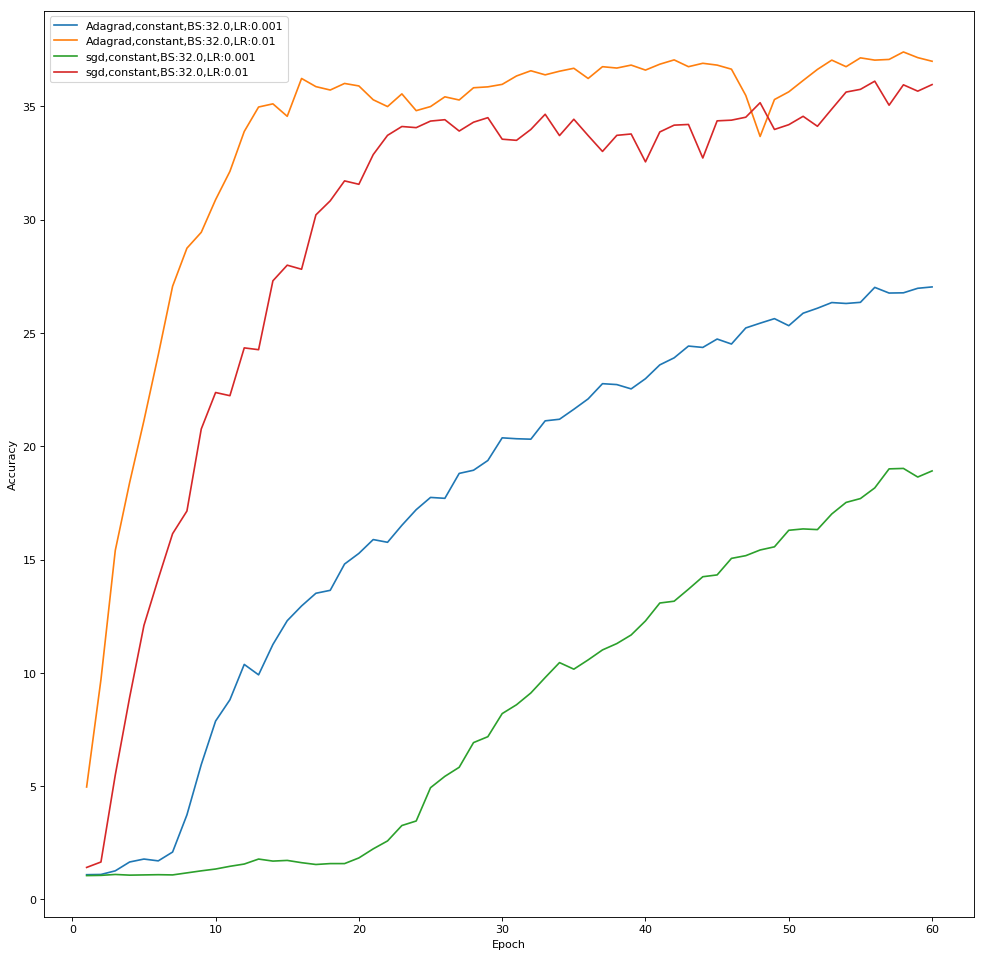

In [16]:
#plt.axis([0,100,0,100])

plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
for filename in printList: 
    plot_x=[]
    plot_y=[]
    opt=[]
    path="./logs/"+filename
    try:
        lines =[line.rstrip('\n') for line in open(path)]
        for i in lines:
            
            if "Epoch" in i:
                x=i.find("accuracy:")
                y=i.find("(")

                plot_x.append(int(i[6:x-3]))
                plot_y.append(float(i[x+10:y-2]))
    except:
        continue
    alg,opt,b_pos,lr = getInfo(filename)
#     labelInfo = "Algo:"+alg+",SD:"+opt+",BS:"+b_pos+",LR:"+lr
    labelInfo = alg+","+opt+",BS:"+b_pos+",LR:"+lr
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(plot_x,plot_y,label=labelInfo)   
plt.legend()
